In [1]:
import pandas as pd

In [2]:
from datetime import date
def get_age(bd,lv):
    bd = str(bd)
    bdy = int(bd[:4])
    bdm = int(bd[4:6])
    bdd = int(bd[6:])
    lv = str(lv)
    lvy = int(lv[:4])
    lvm = int(lv[4:6])
    lvd = int(lv[6:])
    db = date(bdy,bdm,bdd)
    dlv = date(lvy,lvm,lvd)
    return int((dlv - db).days / 365)

In [3]:
sampled_ids = pd.read_csv("sampled_person_ids.csv").person_id.tolist()
person_table = pd.read_csv("../processed_person_table.csv")
last_visit_table = pd.read_csv("last_visit_occurence.csv")
person_table = person_table.loc[person_table.person_id.isin(sampled_ids),:]
visit_table = last_visit_table.loc[last_visit_table.person_id.isin(sampled_ids),:]
person_table = person_table.sort_values("person_id")
visit_table = visit_table.sort_values("person_id")
bds = person_table.birth_day.tolist()
lvs = visit_table.visit_start.tolist()
ages = [get_age(bd,lv) for bd,lv in zip(bds,lvs)]
person_table["age"] = ages
person_table.set_index("person_id", inplace=True)
person_table.drop(["birth_day","race_8500","gender_8507"],axis=1, inplace=True)

In [4]:
del person_table.index.name
person_table.iloc[:4,:]

,gender_8532,race_8515,race_8516,race_8527,race_8552,race_8557,race_8657,ethnicity_38003563,ethnicity_38003564,age
24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,71
62,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,66
106,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,78
126,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,75


In [5]:
death_ids = pd.read_csv("death.csv").person_id.tolist()

In [6]:
labels = []
for i in person_table.index.tolist():
    if i in death_ids:
        labels.append(1)
    else:
        labels.append(0)
print(labels)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

In [7]:
person_table["death"] = labels

In [8]:
person_table

,gender_8532,race_8515,race_8516,race_8527,race_8552,race_8557,race_8657,ethnicity_38003563,ethnicity_38003564,age,death
24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,71,0
62,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,66,0
106,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,78,0
126,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,75,1
130,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,69,0
145,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,62,0
202,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,72,0
225,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,71,0
227,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,61,0
249,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,78,0


In [14]:
#person_features = person_table.drop(["death"],axis=1).values
import numpy as np
person_features = person_table[["age"]].values
person_deaths = np.array(person_table.death.tolist())

In [55]:
person_features

array([[71],
       [66],
       [78],
       ...,
       [71],
       [62],
       [69]])

0.5392991557318687


/Users/Alex/anaconda2/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


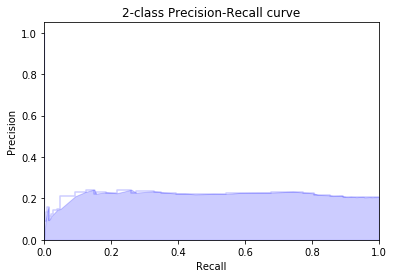

/Users/Alex/anaconda2/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5102942540632643


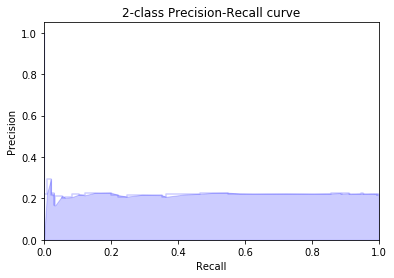

/Users/Alex/anaconda2/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5583793152235427


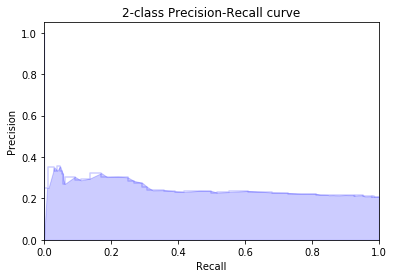

/Users/Alex/anaconda2/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5347850987236829


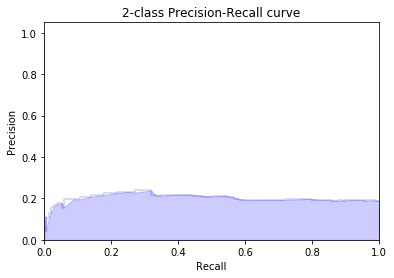

/Users/Alex/anaconda2/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.4921909849070879


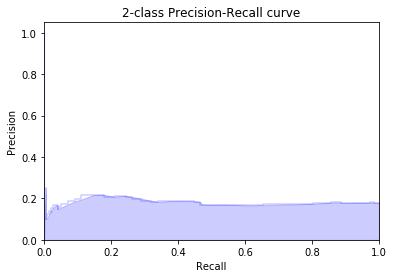

In [65]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import precision_recall_curve, roc_auc_score
from matplotlib import pyplot as plt

kf = KFold(n_splits=5,random_state=2019,shuffle=False)
kf.get_n_splits(person_features)
for train_index, test_index in kf.split(person_features):
    X_train, X_test = person_features[train_index], person_features[test_index]
    y_train, y_test = person_deaths[train_index], person_deaths[test_index]
    lr = LR(class_weight={1:0.8,0:0.2})
    lr.fit(X_train,y_train)
    y_pred = lr.predict_proba(X_test)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    print(roc_auc_score(y_test, y_pred))
    plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve')
    plt.show()
    plt.close()

In [60]:
person_table.to_csv("person_input.csv")

In [15]:
condition_table = pd.read_csv("processed_condition_occurrence2.csv")
condition_table = condition_table.set_index(condition_table.columns[0])
del condition_table.index.name
condition_table = condition_table.loc[person_table.index,:]
condition_table = condition_table.fillna(0)

/Users/Alex/anaconda2/envs/py3/lib/python3.5/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [16]:
condition_table = condition_table.loc[:, (condition_table != 0).any(axis=0)]
print(condition_table.shape)

(5480, 4865)


In [17]:
condition_table.drop([col for col, val in condition_table.sum().iteritems() if val < 5], axis=1,inplace=True)

In [18]:
condition_table["death"] = person_table["death"]
condition_table

,cond_0,cond_22274,cond_22281,cond_22288,cond_22350,cond_23164,cond_23237,cond_23245,cond_23799,cond_23988,...,cond_44783165,cond_44783376,cond_44783618,cond_45767018,cond_45769438,cond_45769441,cond_45769442,cond_45769443,cond_45773005,death
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
145,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [19]:
condition_table.drop(["cond_0"], axis=1, inplace=True)
condition_table.iloc[:3,:]

,cond_22274,cond_22281,cond_22288,cond_22350,cond_23164,cond_23237,cond_23245,cond_23799,cond_23988,cond_24397,...,cond_44783165,cond_44783376,cond_44783618,cond_45767018,cond_45769438,cond_45769441,cond_45769442,cond_45769443,cond_45773005,death
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [21]:
condition_table.to_csv("condition_input.csv")

In [84]:
cond_features = condition_table.drop(["death"], axis=1).values
cond_labels = np.array(condition_table["death"])

0.5912419896246567


/Users/Alex/anaconda2/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


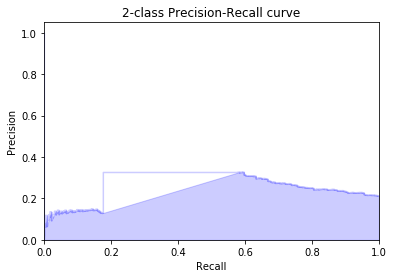

0.5968079756667952


/Users/Alex/anaconda2/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


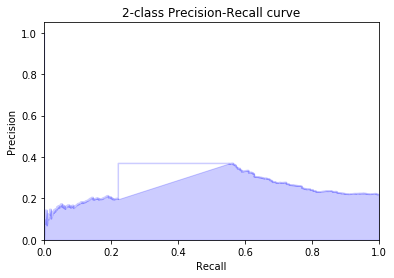

0.5909658218125959


/Users/Alex/anaconda2/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


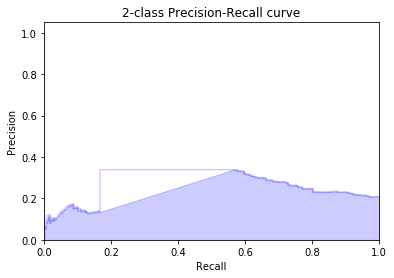

0.6004499836369586


/Users/Alex/anaconda2/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


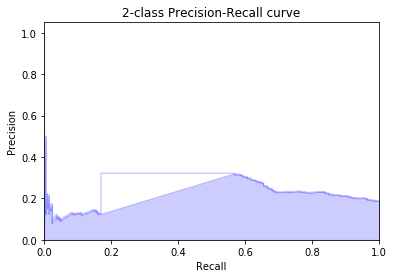

0.6256189900792195


/Users/Alex/anaconda2/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


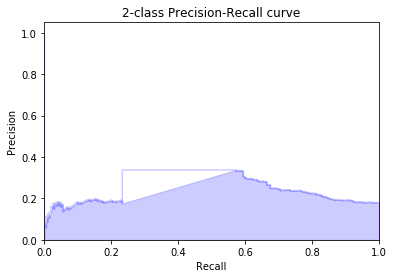

In [85]:
kf = KFold(n_splits=5,random_state=2019,shuffle=False)
kf.get_n_splits(cond_features)

for train_index, test_index in kf.split(cond_features):
    X_train, X_test = cond_features[train_index], cond_features[test_index]
    y_train, y_test = cond_labels[train_index], cond_labels[test_index]
    lr = LR(class_weight={1:0.8,0:0.2})
    lr.fit(X_train,y_train)
    y_pred = lr.predict_proba(X_test)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    print(roc_auc_score(y_test, y_pred))
    plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve')
    plt.show()
    plt.close()

In [3]:
person_df = pd.read_csv("../../features/person_input.csv")
obs_df = pd.read_csv("../../features/obs_concept_input.csv")

In [6]:
ages = (person_df.age - person_df.age.mean())/person_df.age.var()
ages

0      -0.010642
1      -0.043049
2       0.034728
3       0.015283
4      -0.023605
5      -0.068975
6      -0.004161
7      -0.010642
8      -0.075456
9       0.034728
10     -0.023605
11     -0.010642
12      0.041209
13     -0.030087
14     -0.198603
15     -0.068975
16     -0.010642
17     -0.004161
18      0.034728
19      0.015283
20     -0.017124
21      0.099542
22      0.008802
23     -0.010642
24      0.034728
25      0.047690
26     -0.017124
27     -0.043049
28      0.041209
29      0.170837
          ...   
5450   -0.062494
5451    0.054172
5452    0.034728
5453    0.047690
5454   -0.263418
5455   -0.140271
5456   -0.068975
5457    0.080098
5458   -0.010642
5459    0.067135
5460   -0.017124
5461   -0.146752
5462   -0.062494
5463    0.008802
5464    0.021765
5465   -0.017124
5466   -0.017124
5467    0.073616
5468    0.021765
5469    0.002321
5470    0.002321
5471   -0.030087
5472    0.073616
5473   -0.017124
5474    0.080098
5475   -0.295825
5476    0.054172
5477   -0.0106

In [7]:
obs_df["norm_age"] = ages
obs_df

,person_id,431715,197508,4003073,4241527,4137127,432586,4169307,4153882,4133029,...,9203,4105593,417672,141232,4069776,4285898,4338257,4162987,death,norm_age
0,119794,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,-0.010642
1,48449,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.043049
2,133649,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.034728
3,128744,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0.015283
4,81971,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.023605
5,25903,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.068975
6,114252,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.004161
7,147364,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,-0.010642
8,36700,0,1,1,1,0,1,1,1,1,...,1,0,1,0,0,1,1,1,0,-0.075456
9,50834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.034728


In [8]:
obs_df.to_csv("../../features/observation_input.csv")